## **Day 1**

### Exploratory Data Analysis for 2014 Mental Health in Tech Survey


#### Exploratory Data Analysis
Exploratary Data Analysis (EDA) is understanding the basic summary, pattern and characteristics of a dataset without using complicated modeling and statistical tools. Most of the times EDA is done using visuals, so that hundreds of rows of data can be summarized in charts and plots. It can also involve preparation of datasets for analysis by removing non-relevant columns and rows/columns of data with significantly high null values.


#### Source of data
This dataset is imported from the Open Sourcing Mental Illness, LTD Research website. It is a survey containing 1259 responses with 27 questions. It was taken in the year 2014 and is found in https://osmihelp.org/research.




In [18]:
# Import the libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Read in the csv data

data = pd.read_csv('2014.csv')

In [20]:
# Check the top 5 rows to get an idea of the data makeup

data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [21]:
# Get column information with datatype and non null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [22]:
# Check for sum of null values so that columns with significant missing values can be removed.

data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [23]:
# Remove columns as its a significant missing number

data.drop(columns = ['comments'], inplace = True)


# Replace some row values for columns

data['self_employed'].fillna('No',inplace = True)
data['work_interfere'].fillna("Don't know", inplace = True)
data['state'].fillna('Not Applicable', inplace = True)

In [24]:
# Recheck to confirm that there are no missing values anymore.

data.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [25]:
# Deleting rows of data that have misleading age information --> 5 rows removed

data.drop(data[data['Age'] < 15].index, inplace = True)
data.drop(data[data['Age'] > 100].index, inplace = True)

In [26]:
# Check for unique values in gender column

data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [27]:
#Cleaning the rows of gender values so the remaining unique values are only male, female and other.

Male = ['M', 'Male', 'male', 'm', 'maile','Mal','Make', 'Male ', 'Man','msle','Mail', 'Malr']

Female = ['Female', 'female', 'F','Woman', 'f', 'Femake', 'woman', 'Female ', 'femail']

Other = ['Male-ish', 'Trans-female', 'Cis Female', 'something kinda male?','Cis Male', 'Male (CIS)', 
         'queer/she/they', 'non-binary', 'Nah', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender',
         'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous','Trans woman', 'msle', 'Neuter', 
         'Female (trans)', 'queer', 'Female (cis)', 'cis male', 'A little about you', 'Cis Man',
         'ostensibly male, unsure what that really means']

data['Gender'] = data['Gender'].apply(lambda x:"Male" if x in Male else x)
data['Gender'] = data['Gender'].apply(lambda x:"Female" if x in Female else x)
data['Gender'] = data['Gender'].apply(lambda x:"Other" if x in Other else x)

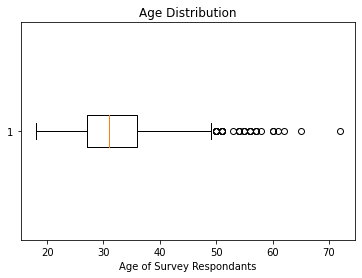

In [28]:
# Box plot for age distribution

plt.boxplot(data['Age'], vert = False)
plt.title('Age Distribution')
plt.xlabel('Age of Survey Respondants')
plt.show()

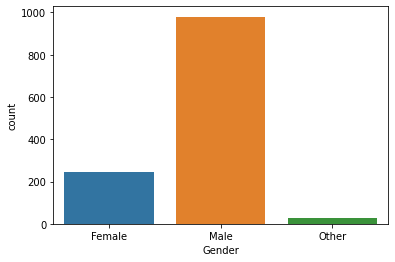

In [29]:
# Count by gender who took the survey

sns.countplot(x = 'Gender', data = data)
plt.show()

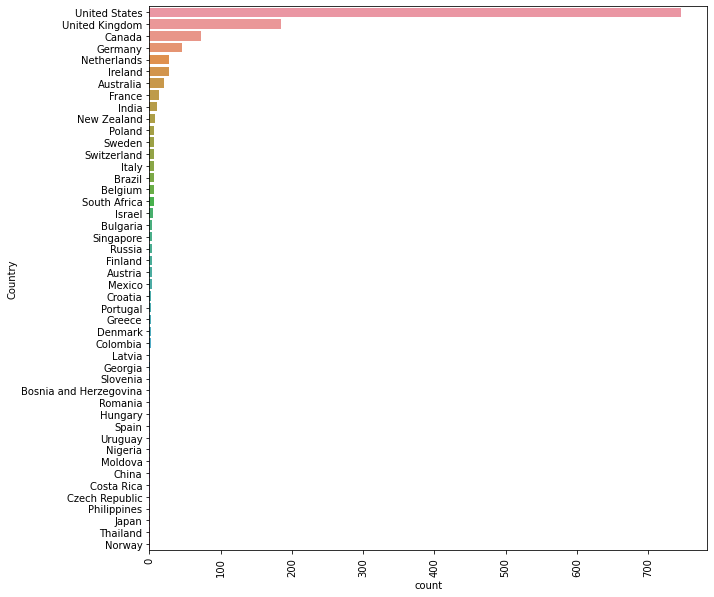

In [30]:
# Number of respondants by country

plt.figure(figsize=(10,10))
sns.countplot(y = 'Country', order= data['Country'].value_counts().index, data = data, orient = 'h')
plt.xticks(rotation=90)
plt.show()

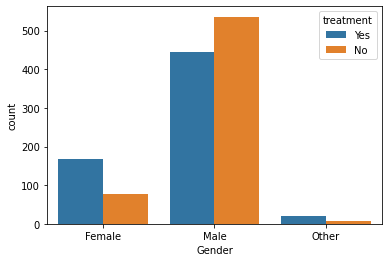

In [31]:
# Which gender has revealed more that they have seeked mental health treatment?

sns.countplot(x='Gender', hue='treatment', data = data)
plt.show()

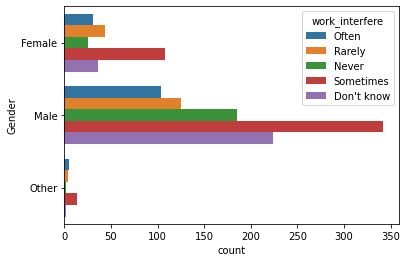

In [32]:
# Would you discuss your mental health issue with your coworkers?

sns.countplot(y = 'Gender', hue = 'work_interfere', data = data)
plt.show()

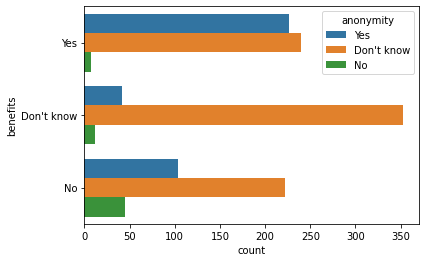

In [33]:
# Does your employer provide mental health benefits and do you know if your anonymity is protected?

sns.countplot(y="benefits", hue = "anonymity", data = data)
plt.show()

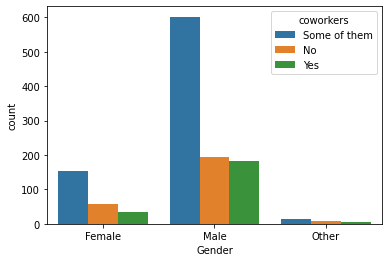

In [34]:
# Would you discuss your mental health issue with your coworkers?

sns.countplot(x = 'Gender', hue = 'coworkers', data = data)
plt.show()